In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Load the data from the CSV into a DataFrame.
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [4]:
# Find tweets that contain an “n/10” rating.  
data['rating'] = data['text'].str.extract(r'(\d+(\.\d+)?)/10', expand=False)[0]  

In [5]:
# Exclude tweets that don't contain a rating.
data = data.dropna(subset=['rating'])

In [6]:
# Remove outliers.
data['rating'] = pd.to_numeric(data['rating'])
data = data[data['rating'] <= 25]  

In [7]:
# Linear Fitting
def to_timestamp(date):
    return date.timestamp()

data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = stats.linregress(data['timestamp'], data['rating'])

## Results

In [8]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [9]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525935e+09,12.303514
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525822e+09,12.301817
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525760e+09,12.300888
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525419e+09,12.295770
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525310e+09,12.294144
...,...,...,...,...,...,...
14885,1275493485085245440,2020-06-23 18:18:39+00:00,This is Ruth. She was spotted at a rally doing...,14.0,1.592936e+09,13.308733
14895,1275102054608855040,2020-06-22 16:23:14+00:00,This is Narcos. He is very angry with you. The...,13.0,1.592843e+09,13.307333
14896,1274821722584125442,2020-06-21 21:49:18+00:00,@PatrickKenneyMD omg i’d say 13/10 but i’d hat...,13.0,1.592776e+09,13.306330
14906,1273774320519483392,2020-06-19 00:27:18+00:00,This is Oakley. He’s on his way home for the f...,12.0,1.592526e+09,13.302583


In [10]:
fit.slope, fit.intercept

(1.500295334373573e-08, -10.590016533606498)

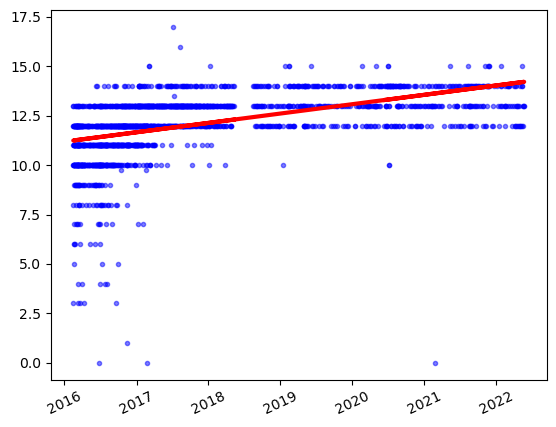

In [11]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

## Exercise 7 - Dog Rates Significance

In [12]:
# Output the p-value from the regression for the question “is the slope different from zero?”. 
fit.pvalue

2.536058725135304e-127

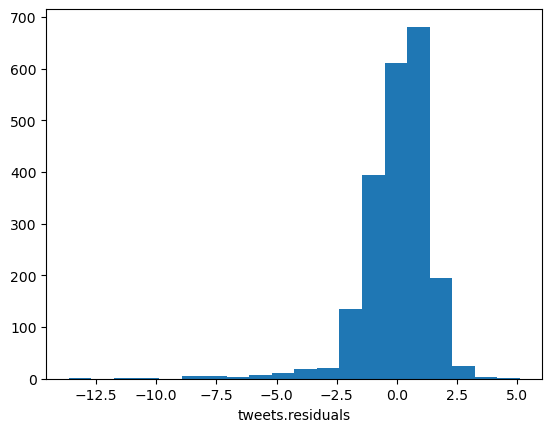

In [13]:
# Plot a histogram of the residuals.
plt.hist(data['rating'] - data['prediction'], bins=20) # observed values minus predicted values
plt.xlabel("tweets.residuals")
plt.show()